# Linear regression (aka ordinary least squares)

### Pros:

1.  **Simple and Interpretable**: Provides clear insights into feature relationships.
2.  **Efficient**: Computationally inexpensive for small to medium datasets.
3.  **Widely Used**: Forms the foundation of many advanced statistical and machine learning models.
4.  **Handles Continuous Data Well**: Works well for numerical target variables.

### Cons:

1.  **Sensitive to Outliers**: Can be heavily influenced by extreme values.
2.  **Assumptions Must Hold**: Performance degrades if assumptions like linearity and independence are violated.
3.  **Limited to Linear Relationships**: Cannot capture complex non-linear patterns without modifications.
4.  **Multicollinearity Issues**: Highly correlated independent variables can distort coefficient estimates.

In [1]:
#Imports from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import mglearn
import numpy as np

ModuleNotFoundError: No module named 'sklearn'

In [14]:
# Get the data, split it into training and test sets, and fit a linear regression model
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [15]:
#Print the coefficients and intercept of the model
#The coeficient is the slope of the line, and the intercept is the offset in the y-axis: in the book it is called w[0] and b
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
Training set score: 0.67
Test set score: 0.66


The scores on the training and test sets are very close together. This means we are likely underfitting.

In [16]:
#Testing the model with the Boston Housing dataset
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


This discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity.

# Ridge Regression
For the Ridge regression variant all entries of w should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regres‐sion is known as L2 regularization.

In [17]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


The training set score of Ridge is lower than for LinearRegression, while the test set score is higher. This is consistent with our expectation. With linear regression, we were overfitting our data. Ridge is a more restricted model, so we are less likely to overfit. Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization.

In [18]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [19]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


Decreasing alpha allows the coefficients to be less restricted. For very small values of alpha, coefficients are barely restricted at all, and we end up with a model that resembles LinearRegression

In [20]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


# Lasso
An alternative to Ridge for regularizing linear regression is Lasso. As with ridge regression, using the lasso also restricts coefficients to be close to zero, but in a slightly different way, called L1 regularization.8 The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model.

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print(f"Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Lasso did quite badly, both on the training and the test set. This indicates that we are underfitting, and we find that it used only 4 of the 105 features. Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls how strongly coefficients are pushed toward zero. In the previous example, we used the default of alpha=1.0. To reduce underfitting, let’s try decreasing alpha.

In [22]:
#alpha is the parameter that controls how much you want to regularize the model
# alpha = 0.01
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(f"Training set score: {lasso001.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso001.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso001.coef_ != 0)}")

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [23]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print(f"Training set score: {lasso00001.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso00001.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso00001.coef_ != 0)}")

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Comparing coefficient magnitudes for lasso regression with different values of alpha and ridge regression

Text(0, 0.5, 'Coefficient magnitude')

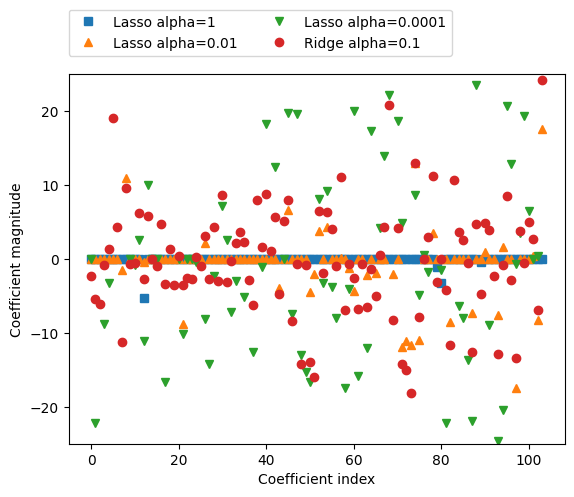

In [24]:
import matplotlib.pyplot as plt
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## Conclusion
In practice, ridge regression is usually the first choice between these two models. However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice. Similarly, if you would like to have a model that is easy to interpret, Lasso will provide a model that is easier to under‐ stand, as it will select only a subset of the input features. scikit-learn also provides the ElasticNet class, which combines the penalties of Lasso and Ridge. In practice, this combination works best, though at the price of having two parameters to adjust: one for the L1 regularization, and one for the L2 regularization.